In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load the dataset
data = pd.read_csv('US_Accidents_March23.csv')

In [3]:
# Data Cleaning: Check for missing values
data = data.dropna(subset=['Weather_Condition', 'Temperature(F)', 'Start_Time', 'Visibility(mi)'])

In [4]:
# Remove unwanted characters from Start_Time
data['Start_Time'] = data['Start_Time'].astype(str).str.replace(r'\.000000000', '', regex=True)

In [5]:
# Convert Start_Time to datetime
data['Start_Time'] = pd.to_datetime(data['Start_Time'], errors='coerce')

In [6]:
# Drop rows where Start_Time could not be converted
data = data.dropna(subset=['Start_Time'])


In [7]:
# Extract hour and day of the week
data['Hour'] = data['Start_Time'].dt.hour
data['DayOfWeek'] = data['Start_Time'].dt.dayofweek

In [8]:
# Analysis: Accident counts by severity
severity_counts = data['Severity'].value_counts()

In [9]:
# Analysis: Accidents by time of day
accidents_by_hour = data['Hour'].value_counts().sort_index()

In [10]:
# Analysis: Accidents by day of the week
accidents_by_day = data['DayOfWeek'].value_counts().sort_index()

In [11]:
# Analysis: Accidents by weather condition
accidents_by_weather = data['Weather_Condition'].value_counts().head(10)

In [12]:
# Analysis: Accidents by visibility
accidents_by_visibility = data['Visibility(mi)'].value_counts().sort_index()

C:\Users\p\AppData\Local\Temp\ipykernel_19888\2464281147.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data, x='Severity', palette='viridis')


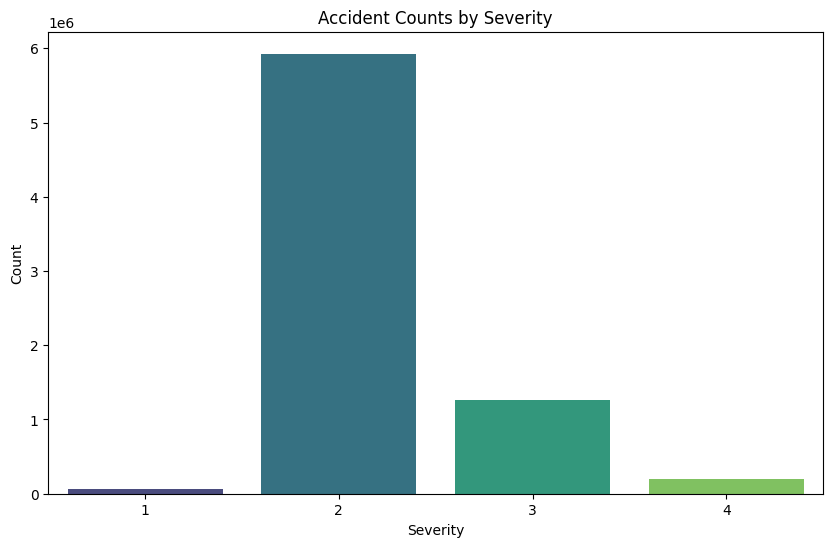

In [13]:
# Visualization: Accident counts by severity
plt.figure(figsize=(10, 6))
sns.countplot(data=data, x='Severity', palette='viridis')
plt.title('Accident Counts by Severity')
plt.xlabel('Severity')
plt.ylabel('Count')
plt.show()

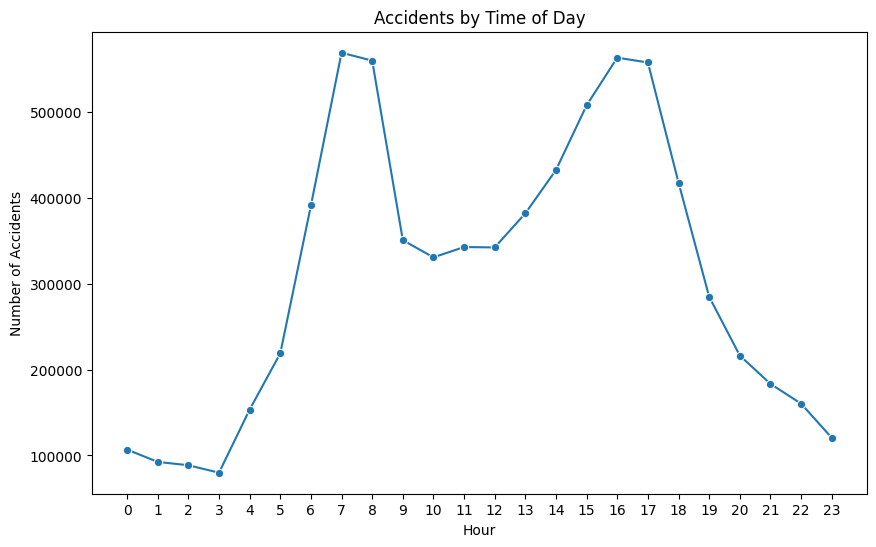

In [14]:
# Visualization: Accidents by time of day
plt.figure(figsize=(10, 6))
sns.lineplot(x=accidents_by_hour.index, y=accidents_by_hour.values, marker='o')
plt.title('Accidents by Time of Day')
plt.xlabel('Hour')
plt.ylabel('Number of Accidents')
plt.xticks(range(24))
plt.show()

C:\Users\p\AppData\Local\Temp\ipykernel_19888\2482479200.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=accidents_by_day.index, y=accidents_by_day.values, palette='viridis')


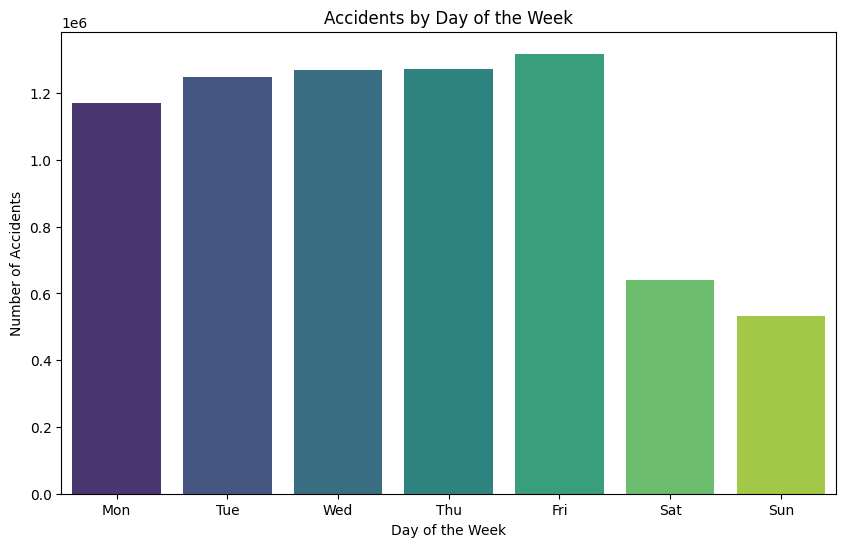

In [15]:
# Visualization: Accidents by day of the week
plt.figure(figsize=(10, 6))
sns.barplot(x=accidents_by_day.index, y=accidents_by_day.values, palette='viridis')
plt.title('Accidents by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Number of Accidents')
plt.xticks(range(7), ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'])
plt.show()

C:\Users\p\AppData\Local\Temp\ipykernel_19888\3579936323.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=accidents_by_weather.index, y=accidents_by_weather.values, palette='viridis')


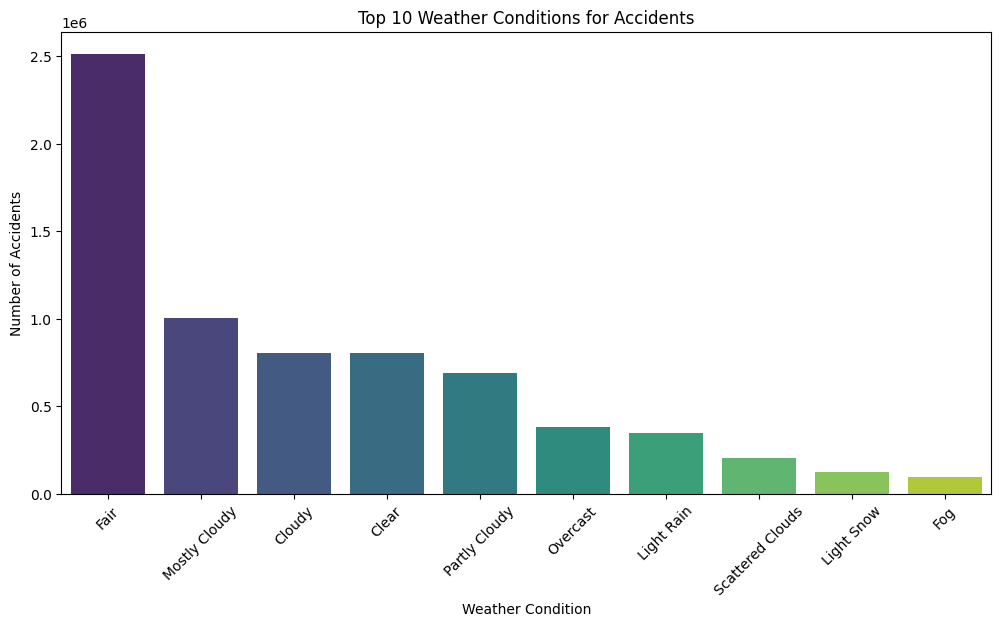

In [16]:
# Visualization: Accidents by weather condition
plt.figure(figsize=(12, 6))
sns.barplot(x=accidents_by_weather.index, y=accidents_by_weather.values, palette='viridis')
plt.title('Top 10 Weather Conditions for Accidents')
plt.xlabel('Weather Condition')
plt.ylabel('Number of Accidents')
plt.xticks(rotation=45)
plt.show()

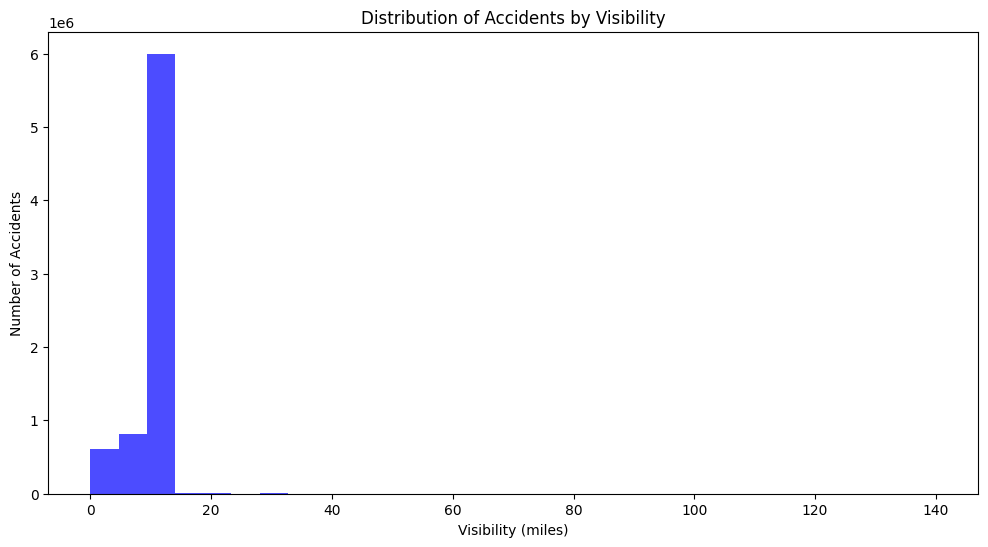

In [17]:
# Visualization: Accidents by visibility
plt.figure(figsize=(12, 6))
plt.hist(data['Visibility(mi)'], bins=30, color='blue', alpha=0.7)
plt.title('Distribution of Accidents by Visibility')
plt.xlabel('Visibility (miles)')
plt.ylabel('Number of Accidents')
plt.show()

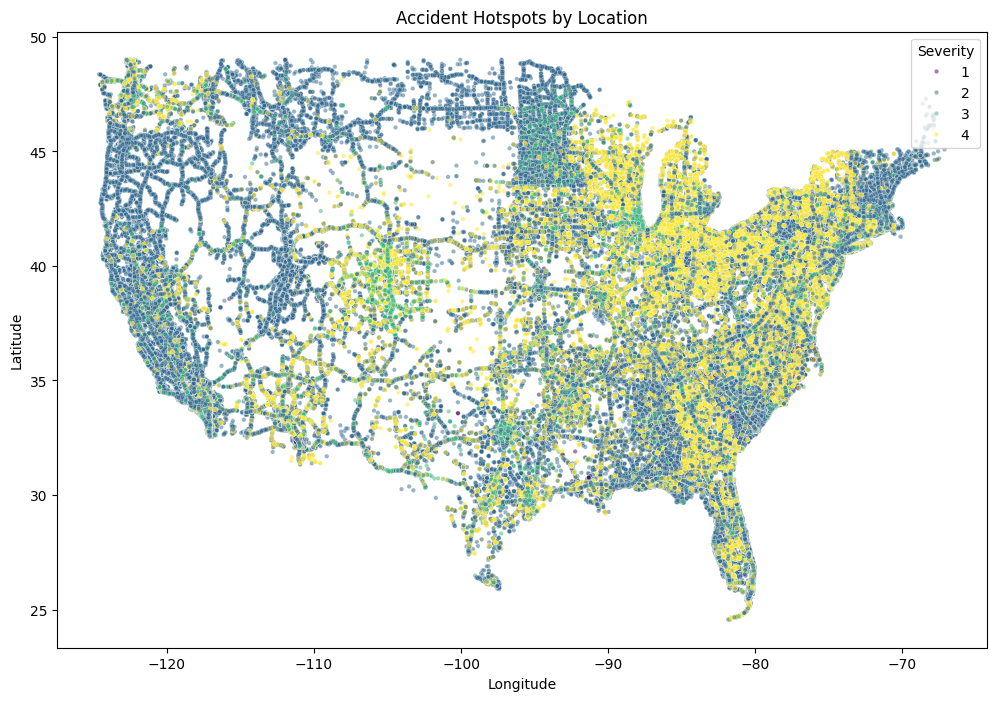

In [18]:
# Hotspot Visualization: Accident locations
plt.figure(figsize=(12, 8))
sns.scatterplot(data=data, x='Start_Lng', y='Start_Lat', hue='Severity', palette='viridis', alpha=0.5, s=10)
plt.title('Accident Hotspots by Location')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.legend(title='Severity', loc='upper right')
plt.show()